In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [6]:
# Extract all rows of data
table = soup.find('table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [16]:
# Create an empty list

# Loop through the scraped data to create a list of rows


rows_total = []
rows = table.find_all('tr', class_='data-row')
for row in rows:
    info = row.find_all('td')
    data = {
        'id': info[0].text.strip(),
        'terrestrial_date': info[1].text.strip(),
        'sol': info[2].text.strip(),
        'ls': info[3].text.strip(),
        'month': info[4].text.strip(),
        'min_temp': info[5].text.strip(),
        'pressure': info[6].text.strip()
    }
    rows_total.append(data)

In [17]:
rows_total

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [20]:
df = pd.DataFrame(rows_total)
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [22]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [24]:
# Change data types for data analysis
correct_type = {
    'id': 'object',
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int64',
    'ls': 'int64',
    'month': 'int64',
    'min_temp': 'float64',
    'pressure': 'float64'
}
df_the_sequel = pd.DataFrame(rows_total).astype(correct_type)
df_the_sequel.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [25]:
# 1. How many months are there on Mars?
months_count = df_the_sequel['month'].nunique()
months_count

12

In [30]:
# 2. How many Martian days' worth of data are there?
martian_days = df_the_sequel['sol'].nunique()
martian_days

1867

In [31]:
# 3. What is the average low temperature by month?
low_temp = df_the_sequel.groupby('month')['min_temp'].mean()
low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: xlabel='Month', ylabel='Temp'>

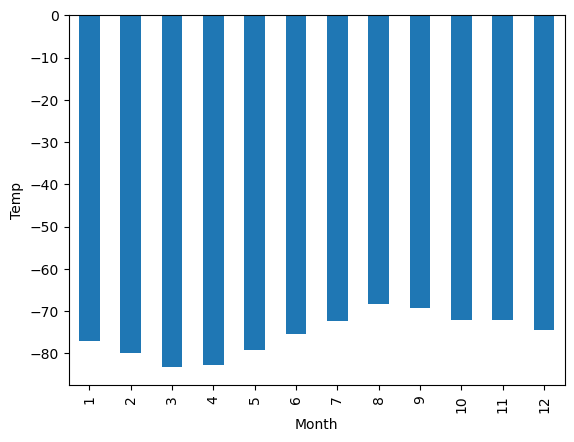

In [32]:
low_temp.plot(kind='bar', xlabel='Month', ylabel='Temp')


In [35]:
ordered_temp = low_temp.sort_values(ascending= True)


<Axes: xlabel='Month', ylabel='Temp'>

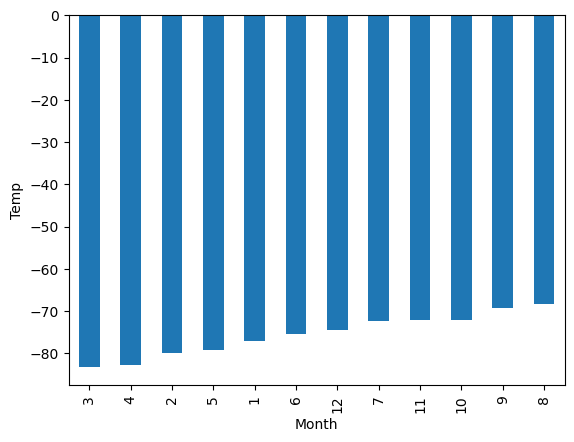

In [36]:
ordered_temp.plot(kind='bar', xlabel='Month', ylabel='Temp')


In [38]:
# 4. Average pressure by Martian month
average_pressure = df_the_sequel.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: xlabel='Month', ylabel='Atmospheric Pressure'>

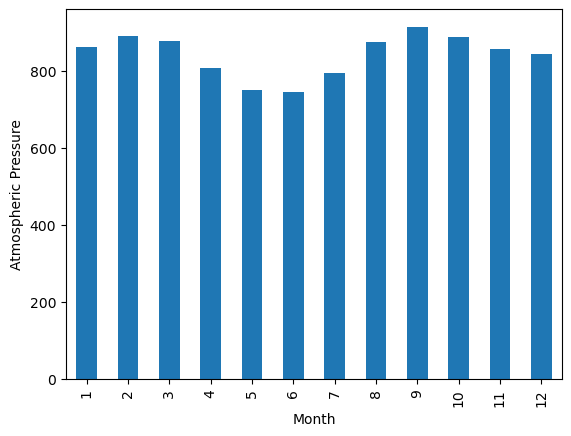

In [39]:
# Plot the average pressure by month

average_pressure.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure')


<Axes: xlabel='Terrestrial Days', ylabel='Minimum Temperature'>

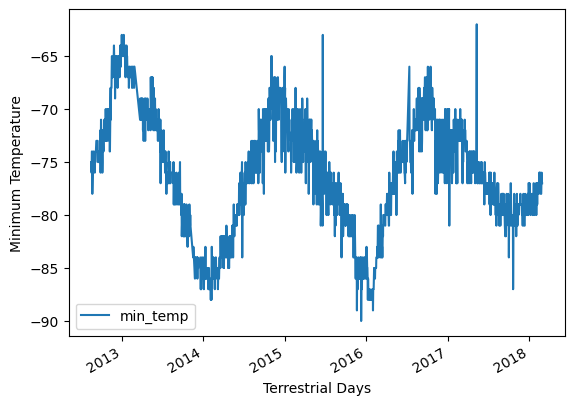

In [40]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df_the_sequel.plot(x='terrestrial_date', y='min_temp', xlabel='Terrestrial Days', ylabel='Minimum Temperature')
# Looks to be around 600=700 days

In [41]:
df_the_sequel.to_csv('mars_weather_data.csv', index=False)


In [ ]:
browser.quit()